In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jrnai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
thaiVilla = pd.read_excel('NobuReview.xlsx').drop(columns = ['Unnamed: 0'])
thaiVilla['Date'] = pd.to_datetime(thaiVilla['Date'])

In [3]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date
0,414,David X.,5,A bit on the pricier side of things but it was...,38,37,2021-10-10
1,16,Bianca W.,5,Ok so here's the list of things I had! All I'm...,95,253,2021-09-17
2,11,Ms F.,3,It's asian fusion than Japanese. Miso black co...,216,106,2021-08-10
3,11,Cindy Y.,5,Fond memories! Bruce and I love this place. We...,50,398,2021-10-25
4,14,Joe O.,4,My girlfriend and I came here for the first ti...,54,74,2021-08-08
...,...,...,...,...,...,...,...
452,0,Stewart H.,5,Tried the new spot. Everything as before but ...,11,0,2017-05-21
453,0,John M.,2,After going to the TriBeCa location for the pa...,2,0,2017-04-20
454,0,Dottie N.,5,Ambience is chic elegant the space is beautifu...,74,1,2017-05-18
455,0,Joe L.,5,"it's pricey, but you get what you pay for....b...",24,3,2018-06-20


In [4]:
thaiMenu = {'CLASSIC BENTO BOX',
 'POWER BENTO BOX',
 'SUSHI SELECTION',
 'SASHIMI SELECTION',
 'Toro Tartare with Caviar',
 'Salmon or Yellowtail Tartare',
 'Sashimi Salad with Matsuhisa Dressing',
 'Lobster Shiitake Salad with Spicy Lemon Dressing',
 'Yellowtail Jalapeno',
 'Tiradito',
 'Tuna Tataki with Tosazu',
 'New Style Sashimi',
 'Fluke Sashimi Dry Miso',
 'Crispy Rice with Spicy Tuna',
 'Baby Spinach Salad with Dry Miso & Grilled Shrimp',
 'Baby Spinach Salad with Lobster',
 'Black Cod with Miso',
 'Black Cod Butter Lettuce',
 "Squid 'Pasta' with Light Garlic Sauce",
 'Rock Shrimp Tempura with Creamy Spicy Sauce or Ponzu',
 'King Crab Tempura Amazu Ponzu',
 'Lobster Wasabi Pepper',
 'Chicken',
 'Grilled Salmon',
 'Beef Tenderloin',
 'Tofu & Vegetables Spicy Garlic',
 'Miso Soup with Tofu',
 'Edamame',
 'Edamame Choclo',
 'Shishito Sea Salt',
 'Shishito Den Miso',
 'Vegetable',
 'Tuna',
 'Salmon',
 'King Crab',
 'Lobster',
 'Wagyu',
 'Field Greens',
 'Shiitake Salad with Spicy Lemon Dressing',
 'Baby Spinach Salad with Dry Miso',
 'Crispy Rice with Spicy Avocado',
 'Eggplant with Miso',
 'Roasted Cauliflower Jalapeno Salsa',
 'Shojin - Vegetable Tempura Selection',
 'Warm Mushroom Salad',
 'Tofu New Style',
 'Tuna',
 'Toro',
 'Salmon',
 'Yellowtail',
 'Fluke',
 'Japanese Red Snapper',
 'Shrimp',
 'Snow Crab',
 'King Crab',
 'Scallop',
 'Octopus',
 'Japanese Eel',
 'Japanese Sea Urchin',
 'Smelt Eggs',
 'Salmon Eggs',
 'Tamago',
 'Wagyu',
 'BENTO BOX',
 'BANANA SOY TOBAN',
 'WHISKY CAPPUCCINO',
 'SOBA CHA BROWNIE',
 'DOWNTOWN CHEESECAKE',
 'PINEAPPLE COCONUT CAKE',
 'HOUSE-MADE GELATO OR SORBET',
 'MOCHI ICE CREAM',
 'Coffee',
 'Espresso',
 'Americano',
 'Macchiato',
 'Cortado',
 'Cappuccino',
 'Cafe Latte',
 'HOJICHAWarm smoky notes with hints of caramel',
 'BLACK ORCHIDYlang ylang flower scented, with smooth vanilla & mandarin notes',
 'NOBU SHISOCaptivating fragrance of shiso leaf, delicate sweetness, subtle character',
 'SOBACHA (Caffeine-Free)Rich malty and nutty aroma with a smooth buttery finish',
 'LEMONGRASS GINGER (Caffeine-Free)Aromatic lemongrass, balanced with warm, spicy ginger',
 'SOOTHE (Caffeine-Free)Comforting floral note with relaxing minty scent'}

# Distribution of the Friends Feature

In [5]:
friends = thaiVilla['Friends']

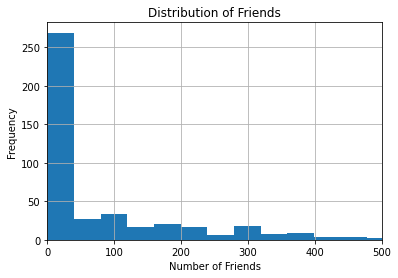

In [6]:
friends.hist(bins = 100)
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 500)
plt.title('Distribution of Friends')
#plt.figure(figsize=(20,20))
plt.show()

In [7]:
friends.describe()

count     457.000000
mean      122.129103
std       281.687145
min         0.000000
25%         0.000000
50%        16.000000
75%       145.000000
max      3984.000000
Name: Friends, dtype: float64

# Distribution of the Ratings Feature

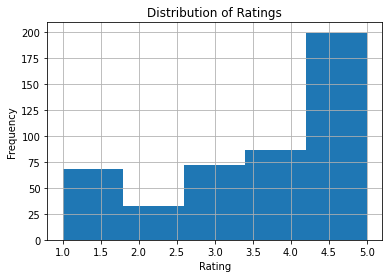

In [8]:
Ratings = thaiVilla['Rating']
Ratings.hist(bins = 5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
#plt.xlim(xmin=0, xmax = 150)
plt.title('Distribution of Ratings')
#plt.figure(figsize=(20,20))
plt.show()

In [9]:
Ratings.describe()

count    457.000000
mean       3.691466
std        1.456607
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

# Distribution of the UserReviews Feature

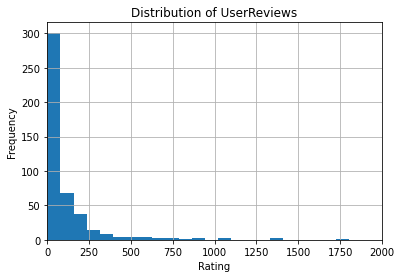

In [10]:
UserReviews = thaiVilla['UserReviews']
UserReviews.hist(bins = 50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 2000)
plt.title('Distribution of UserReviews')
#plt.figure(figsize=(20,20))
plt.show()

In [11]:
UserReviews.describe()

count     457.000000
mean      118.975930
std       268.063682
min         1.000000
25%        13.000000
50%        39.000000
75%       128.000000
max      3918.000000
Name: UserReviews, dtype: float64

# Distribution of the Photos Feature

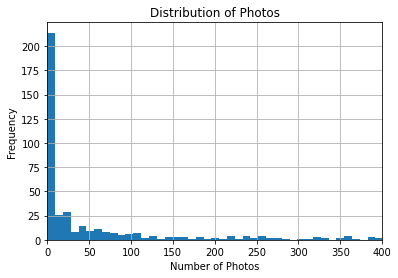

In [12]:
Photos = thaiVilla['Photos']
Photos.hist(bins = 1000)
plt.xlabel('Number of Photos')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Photos')
#plt.figure(figsize=(20,20))
plt.show()

In [13]:
Photos.describe()

count     457.000000
mean      227.877462
std       782.997946
min         0.000000
25%         1.000000
50%        11.000000
75%       111.000000
max      9334.000000
Name: Photos, dtype: float64

# Time Series of Ratings vs Time

In [14]:
import datetime
import random
import matplotlib.pyplot as plt

In [15]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [16]:
sortedDf = pd.DataFrame(sortedDf.groupby("Date")["Rating"].mean())

In [17]:
x = sortedDf.index
y = sortedDf['Rating']

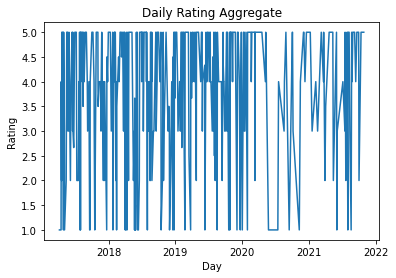

<Figure size 3600x1080 with 0 Axes>

In [18]:
plt.plot(x,y)
plt.title('Daily Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Day')
plt.figure(figsize=(50,15))
plt.show()

In [19]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [20]:
monthlyRating = pd.DataFrame(sortedDf.groupby([sortedDf['Date'].dt.year.rename('year'), sortedDf['Date'].dt.month_name().rename('month')])['Rating'].mean().reset_index())

In [21]:
monthlyRating['my'] = monthlyRating['year'].astype(str) + ' ' + monthlyRating['month'].astype(str)

In [22]:
monthlyRating

,year,month,Rating,my
0,2017,April,3.000000,2017 April
1,2017,August,4.153846,2017 August
2,2017,December,3.428571,2017 December
3,2017,July,3.750000,2017 July
4,2017,June,3.538462,2017 June
5,2017,May,3.923077,2017 May
6,2017,November,4.111111,2017 November
7,2017,October,4.125000,2017 October
8,2017,September,3.142857,2017 September
9,2018,April,2.888889,2018 April


In [23]:
x = monthlyRating['my']
y = monthlyRating['Rating']

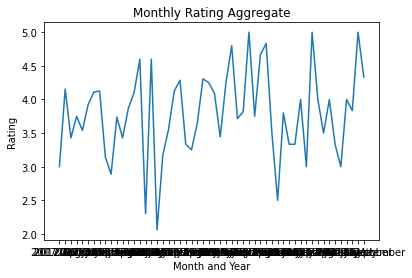

<Figure size 3600x1080 with 0 Axes>

In [24]:
plt.plot(x,y)
plt.title('Monthly Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Month and Year')
plt.figure(figsize=(50,15))
plt.show()

# Food Occurences in Menu

In [25]:
lst = []
for i, row in thaiVilla.iterrows():
    count = 0
    s = row.Review.lower().replace(' ', '')
    for i in thaiMenu:
        i = i.lower()
        if i.replace(' ', '') in s:
            count += 1
    lst.append(count)
    
#     print(i, row)
#     count = 0
#     s = row.Review.lower()
#     s = s.plit()
#     seven = s[:7]
#     six = s[:6]
#     five = s[:5]
#     four = s[:4]
#     three = s[:3]
#     two = s[:2]
#     for j in s:
#         if j in thaiMenu:
#             count += 1
#     for j in s:
#         if seven in s or sixe.....:
#             count += 1
#         seven = seven[1:] + [j]
#         ...
#     lst.append(count)
#     break

In [26]:
thaiVilla['Food Occurs'] = lst

# Catching Sentiment in Reviews

In [27]:
positive = {'best', 'amazing', 'love', 'good', 'perfect', 'fantastic', 'beautiful', 'yummy', 'delicious'}
negative = {'horrible', 'bad', 'gross', 'hate', 'disgusting', 'dread', 'terrible'}

In [28]:
plst = []
nlst = []
for i, row in thaiVilla.iterrows():
    gcount = 0
    ncount = 0
    s = row.Review.lower().replace(' ', '')
    for i in positive:
        if i in s:
            gcount += 1
    for i in negative:
        if i in s:
            ncount += 1     
    plst.append(gcount)
    nlst.append(ncount)

In [29]:
thaiVilla['Positive Occurs'] = plst
thaiVilla['Negative Occurs'] = nlst

In [30]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date,Food Occurs,Positive Occurs,Negative Occurs
0,414,David X.,5,A bit on the pricier side of things but it was...,38,37,2021-10-10,1,2,0
1,16,Bianca W.,5,Ok so here's the list of things I had! All I'm...,95,253,2021-09-17,12,1,1
2,11,Ms F.,3,It's asian fusion than Japanese. Miso black co...,216,106,2021-08-10,0,0,0
3,11,Cindy Y.,5,Fond memories! Bruce and I love this place. We...,50,398,2021-10-25,1,1,0
4,14,Joe O.,4,My girlfriend and I came here for the first ti...,54,74,2021-08-08,4,3,1
...,...,...,...,...,...,...,...,...,...,...
452,0,Stewart H.,5,Tried the new spot. Everything as before but ...,11,0,2017-05-21,0,1,0
453,0,John M.,2,After going to the TriBeCa location for the pa...,2,0,2017-04-20,1,3,0
454,0,Dottie N.,5,Ambience is chic elegant the space is beautifu...,74,1,2017-05-18,0,3,0
455,0,Joe L.,5,"it's pricey, but you get what you pay for....b...",24,3,2018-06-20,0,1,0


# Correlation Heatmap

<AxesSubplot:>

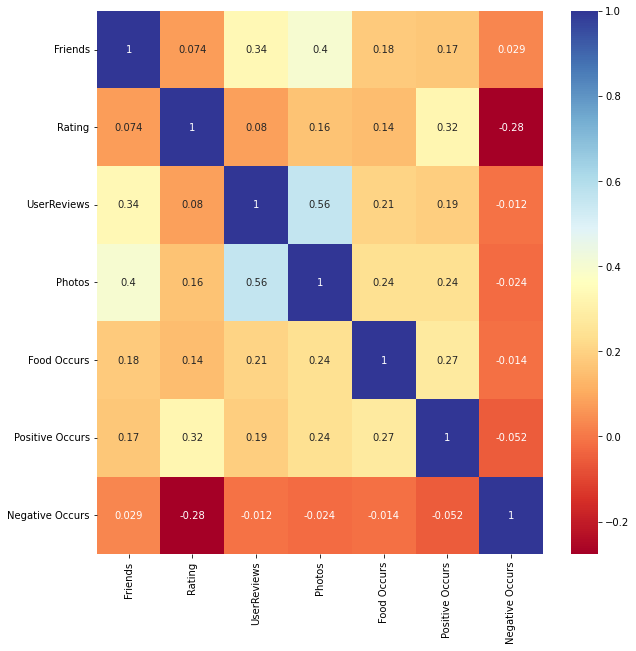

In [31]:
correlation = thaiVilla[['Friends', 'Rating', 'UserReviews', 'Photos', 'Food Occurs', 'Positive Occurs', 'Negative Occurs']]

corr = correlation.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

# Positive Sentiment Analysis

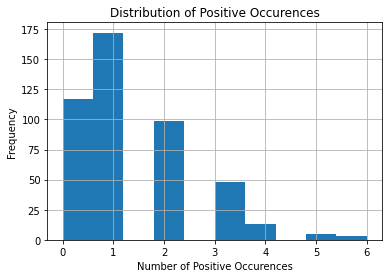

In [32]:
posOcc = thaiVilla['Positive Occurs']
posOcc.hist(bins = 10)
plt.xlabel('Number of Positive Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Positive Occurences')
#plt.figure(figsize=(20,20))
plt.show()

# Negative Sentiment Analysis

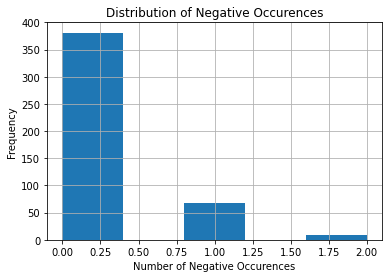

In [33]:
negOcc = thaiVilla['Negative Occurs']
negOcc.hist(bins = 5)
plt.xlabel('Number of Negative Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Negative Occurences')
#plt.figure(figsize=(20,20))
plt.show()

In [35]:
score_df = pd.DataFrame(columns = ['Menu Item', 'Positive', 'Negative', 'Neutral', 'Score'])

for item in thaiMenu:
    item = item.lower()
    pos = 0
    neg = 0
    neu = 0
    rating = 0
    for review in thaiVilla['Review']:
        review = review.lower()
        sentences_with_item = []
        sents = nltk.tokenize.sent_tokenize(review)
        for sent in sents:
           if sent.find(item) != -1:
                sentences_with_item.append(sent)
        for sent in sentences_with_item:
           # print(sent)
            score = sid.polarity_scores(sent)
            #print(score)
            rating += score['compound']
            if score['compound'] > 0:
                pos += 1
            elif score['compound'] < 0:
                neg += 1
            else:
                neu += 1
    total_mentions = pos + neg + neu
    if total_mentions > 10:
        #pct_pos = pos / total_mentions
        avg = rating / total_mentions

        score_df = score_df.append({'Menu Item' : item, 'Positive' : pos, 'Negative' : neg, 'Neutral' : neu, 'Score': avg},
                ignore_index = True)
score_df = score_df.sort_values(by=['Score'])
print('WORST')
for index, row in score_df.head(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
print()
print('BEST')
for index, row in score_df.tail(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
    # print(item)
    # print('pos: ' + str(pos))
    # print('neg ' + str(neg))
    # print()
score_df







WORST
chicken: 0.09826470588235292
fluke: 0.16974615384615385
tuna: 0.21952929292929288

BEST
yellowtail: 0.4192933333333333
bento box: 0.42377857142857145
edamame: 0.4428166666666667


,Menu Item,Positive,Negative,Neutral,Score
13,chicken,6,4,7,0.098265
4,fluke,5,3,5,0.169746
0,tuna,50,19,30,0.219529
7,king crab,8,2,1,0.240364
11,salmon,37,8,22,0.272678
2,toro,12,4,7,0.278652
3,scallop,7,1,4,0.314400
6,black cod with miso,9,2,4,0.337320
1,shrimp,41,7,17,0.348692
10,wagyu,25,5,6,0.380022
